In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [3]:
df.shape

(301355, 5)

In [4]:
df.columns

Index(['Дата', 'Склад', 'Контрагент', 'Номенклатура', 'Количество'], dtype='object')

In [5]:
df.info

<bound method DataFrame.info of               Дата  Склад   Контрагент Номенклатура  Количество
0       2018-01-04      1    address_0    product_0           4
1       2018-01-04      1    address_0    product_1           4
2       2018-01-04      1    address_0    product_2           5
3       2018-01-04      1    address_0    product_3          10
4       2018-01-04      1    address_0    product_4           2
...            ...    ...          ...          ...         ...
301350  2018-08-31      5  address_173   product_15           0
301351  2018-08-31      5  address_173   product_17           1
301352  2018-08-31      5  address_173   product_18           1
301353  2018-08-31      5  address_173   product_19           0
301354  2018-08-31      5  address_173   product_20           2

[301355 rows x 5 columns]>

In [6]:
df.dtypes

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object

Сразу переведем столбец "Дата" в правильный формат

In [7]:
df['Дата'] = pd.to_datetime(df['Дата'])

In [8]:
df.dtypes

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object

Сгруппируйте данные по дате, посчитайте количество продаж

In [9]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [10]:
grouped_df.head()

,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


Нарисуйте график продаж у `grouped_df`

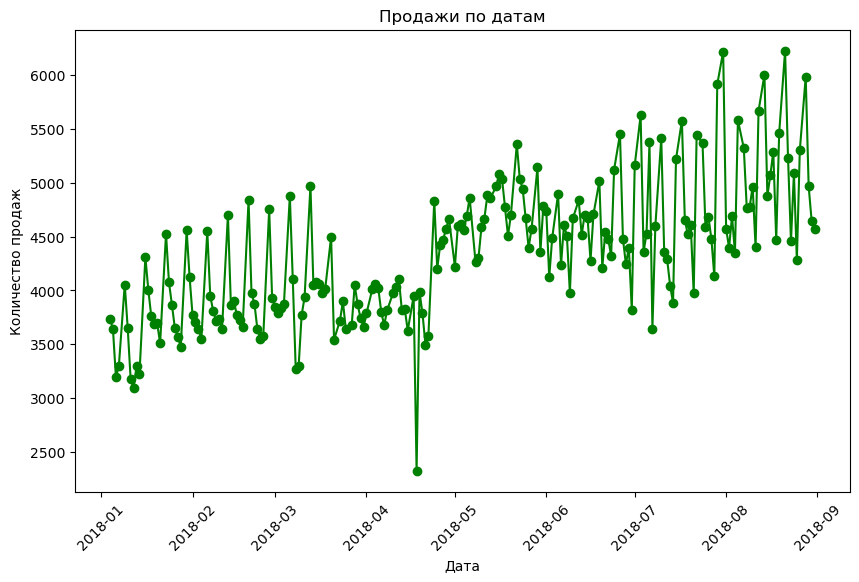

In [11]:
plt.figure(figsize=(10,6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o', linestyle='-', color='g')
plt.title('Продажи по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

На этом графике количество продаж по датам, мы видим что с 1 числа по 4 продажи меняется в коротком диапозоне, и к 2018-05 резко подает и дальше выше и выше.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [12]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

out = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

max_out = out.loc[out['Количество'].idxmax()]

print("Максимальный выброс:")
print(max_out)

Максимальный выброс:
Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [13]:
df['Месяц'] = df['Дата'].dt.month
df_filtered = df[df['Месяц'].isin([6, 7, 8])].copy() 

df_filtered['День недели'] = df_filtered['Дата'].dt.weekday 
df_filtered = df_filtered[df_filtered['День недели'] == 2]

top_sales = df_filtered.groupby(['Склад', 'Номенклатура'])['Количество'].sum().reset_index()

top_per_store = top_sales.loc[top_sales.groupby('Склад')['Количество'].idxmax()]

#print("Топовые прожади:")
#print(top_sales)

print("Топовые товары по каждому складу и количество продаж:")
print(top_per_store)

Топовые товары по каждому складу и количество продаж:
    Склад Номенклатура  Количество
1       1    product_1        2981
24      2    product_1        2887
46      3    product_1        2267
69      4    product_1        2385
92      5    product_1        1956


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [18]:
weather_data = pd.read_excel('archiv.xlsx')

In [19]:
weather_data.head()

,Дата,T
0,2018-08-31,8.2
1,2018-08-31,9.6
2,2018-08-31,11.3
3,2018-08-31,12.3
4,2018-08-31,13.2


In [20]:
weather_data = weather_data.groupby('Дата')['T'].mean().reset_index()

In [21]:
weather_data.head()

,Дата,T
0,2018-01-01,-9.4625
1,2018-01-02,-9.5125
2,2018-01-03,-11.4625
3,2018-01-04,-14.0750
4,2018-01-05,-16.8625


In [22]:
weather_data.dtypes

Дата    datetime64[ns]
T              float64
dtype: object

In [23]:
merged_df = pd.merge(grouped_df, weather_data, on='Дата', how='left')


In [24]:
merged_df.head()

,Дата,Количество,T
0,2018-01-04,3734,-14.0750
1,2018-01-05,3643,-16.8625
2,2018-01-06,3193,-13.3000
3,2018-01-07,3298,-12.7500
4,2018-01-09,4055,-6.2500


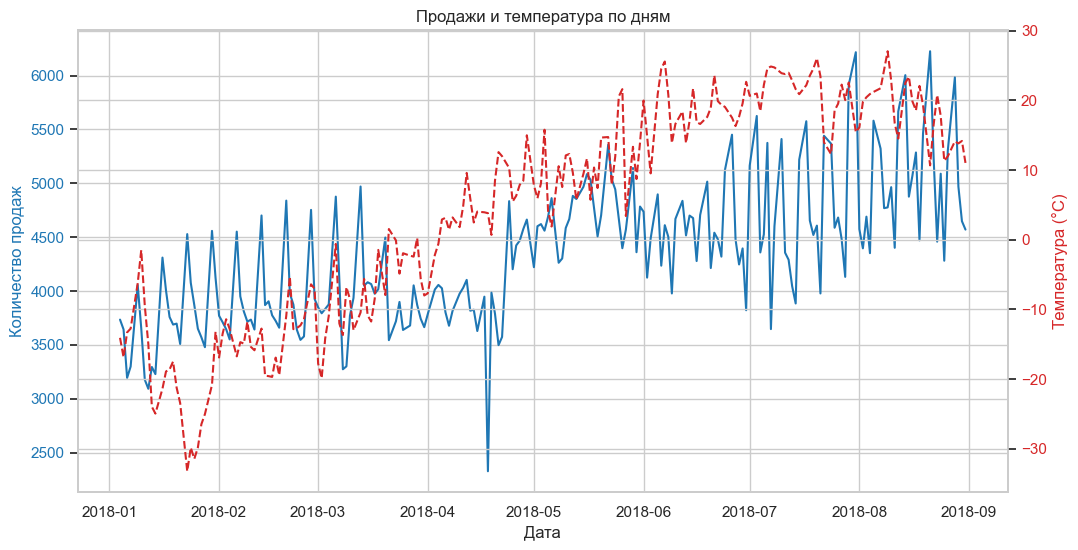

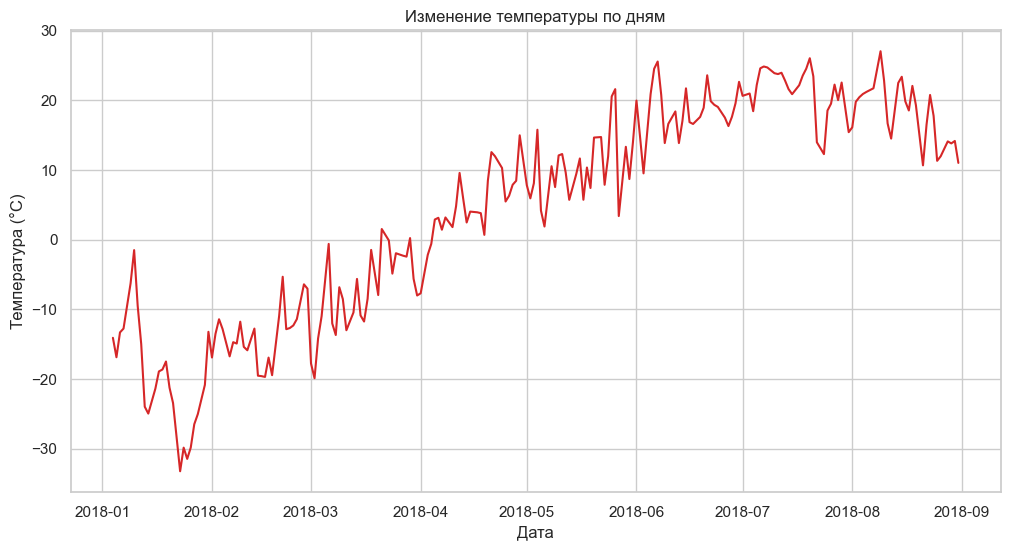

In [27]:
sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel("Дата")
ax1.set_ylabel("Количество продаж", color="tab:blue")
ax1.plot(merged_df["Дата"], merged_df["Количество"], color="tab:blue", label="Количество продаж")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Температура (°C)", color="tab:red")
ax2.plot(merged_df["Дата"], merged_df["T"], color="tab:red", linestyle="dashed", label="Температура (°C)")
ax2.tick_params(axis="y", labelcolor="tab:red")

plt.title("Продажи и температура по дням")
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x=merged_df["Дата"], y=merged_df["T"], color="tab:red")
plt.xlabel("Дата")
plt.ylabel("Температура (°C)")
plt.title("Изменение температуры по дням")
plt.show()
